In [1]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
#Imports for project 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn import datasets, linear_model
import pandas as pd
import numpy as np
import seaborn as sns 


/Users/JillianOcasio/anaconda/envs/py2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [3]:
data_dict.pop( "TOTAL", 0 ) 

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [4]:
data_dict.pop( "THE TRAVEL AGENCY IN THE PARK", 0 ) 

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [5]:
dataDF = pd.DataFrame.from_dict(data_dict, orient = 'index' ,
                  dtype = float)

In [6]:
#Changes a POI to a categorical variable
def change_to_POI(element):
    if element== 0: 
        return "Not a POI" 
    elif element==1:
        return "POI"

In [7]:
dataDF['poi_status']=dataDF['poi'].apply(change_to_POI)

In [8]:
dataDF["percentage_emails_to_poi"]=dataDF["from_this_person_to_poi"]/dataDF['from_messages']

In [9]:
dataDF['percentage_emails_from_poi']=dataDF["from_poi_to_this_person"]/dataDF['to_messages']

In [10]:
dataDF.head(10)

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person,poi_status,percentage_emails_to_poi,percentage_emails_from_poi
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,...,65.0,0.0,NaN,-3081055.0,304805.0,phillip.allen@enron.com,47.0,Not a POI,0.029613,0.016196
BADUM JAMES P,NaN,NaN,178980.0,182466.0,257817.0,NaN,NaN,NaN,NaN,257817.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Not a POI,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,4046157.0,NaN,1757552.0,465.0,-560222.0,5243487.0,...,0.0,0.0,NaN,-5104.0,NaN,james.bannantine@enron.com,39.0,Not a POI,0.000000,0.068905
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,NaN,NaN,10623258.0,...,NaN,0.0,NaN,-1386055.0,1586055.0,NaN,NaN,Not a POI,NaN,NaN
BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,145796.0,NaN,-82782.0,63014.0,...,NaN,0.0,NaN,-201641.0,NaN,frank.bay@enron.com,NaN,Not a POI,NaN,NaN
BAZELIDES PHILIP J,80818.0,NaN,684694.0,860136.0,1599641.0,NaN,NaN,NaN,NaN,1599641.0,...,NaN,0.0,NaN,NaN,93750.0,NaN,NaN,Not a POI,NaN,NaN
BECK SALLY W,231330.0,7315.0,NaN,969068.0,NaN,700000.0,126027.0,2639.0,NaN,126027.0,...,386.0,0.0,NaN,NaN,NaN,sally.beck@enron.com,144.0,Not a POI,0.088879,0.019686
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,NaN,1110705.0,...,108.0,1.0,NaN,-2334434.0,NaN,tim.belden@enron.com,228.0,POI,0.223140,0.028532
BELFER ROBERT,NaN,NaN,-102500.0,102500.0,3285.0,NaN,NaN,NaN,44093.0,-44093.0,...,NaN,0.0,3285.0,NaN,NaN,NaN,NaN,Not a POI,NaN,NaN
BERBERIAN DAVID,216582.0,NaN,NaN,228474.0,1624396.0,NaN,869220.0,NaN,NaN,2493616.0,...,NaN,0.0,NaN,NaN,NaN,david.berberian@enron.com,NaN,Not a POI,NaN,NaN


In [11]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 24 columns):
salary                        94 non-null float64
to_messages                   86 non-null float64
deferral_payments             38 non-null float64
total_payments                123 non-null float64
exercised_stock_options       101 non-null float64
bonus                         81 non-null float64
restricted_stock              109 non-null float64
shared_receipt_with_poi       86 non-null float64
restricted_stock_deferred     17 non-null float64
total_stock_value             125 non-null float64
expenses                      94 non-null float64
loan_advances                 3 non-null float64
from_messages                 86 non-null float64
other                         91 non-null float64
from_this_person_to_poi       86 non-null float64
poi                           144 non-null float64
director_fees                 16 non-null float64
deferred_income           

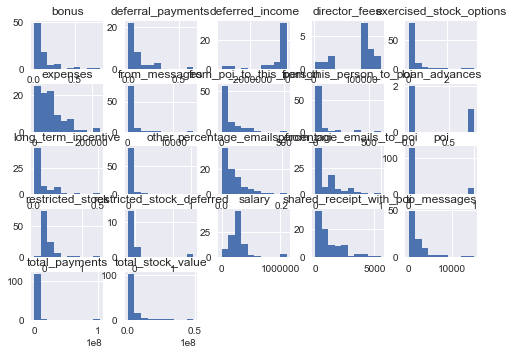

In [12]:
dataDF.hist()
plt.show()

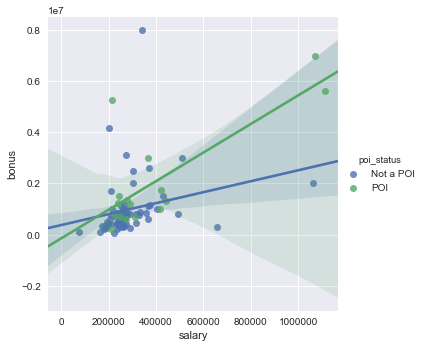

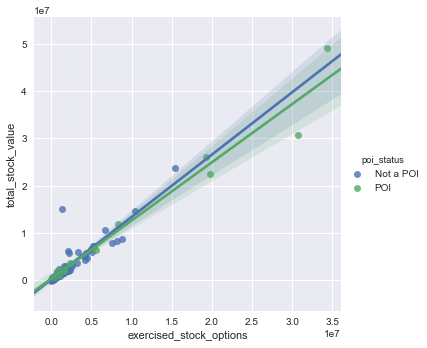

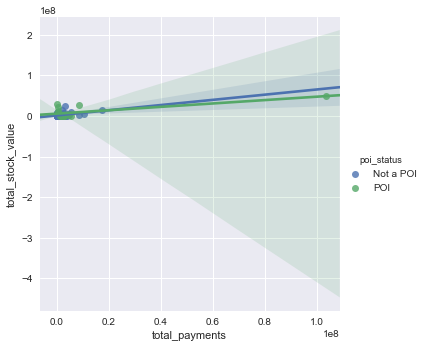

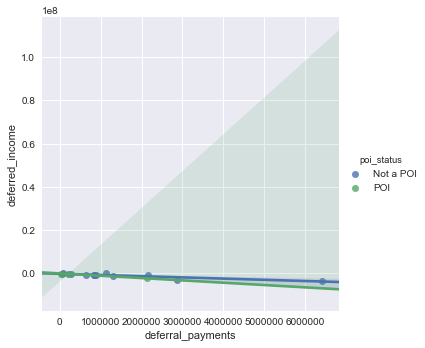

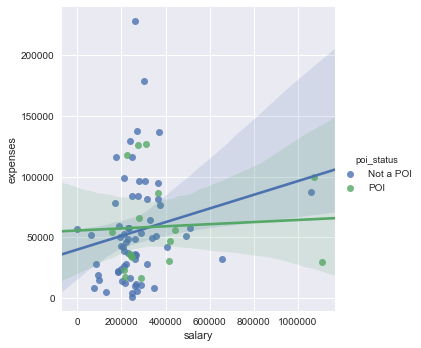

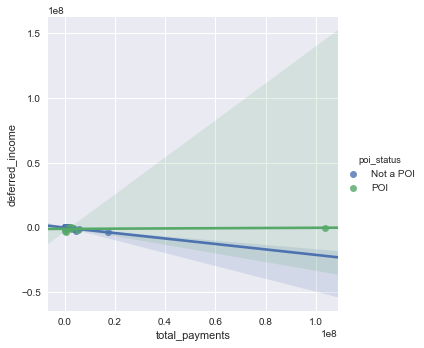

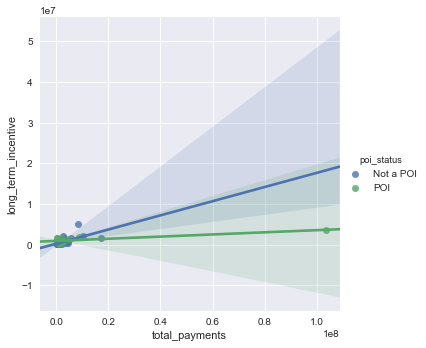

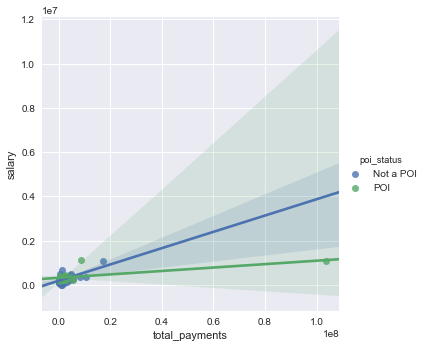

In [13]:

sns.lmplot('salary', 'bonus', data=dataDF, hue='poi_status', fit_reg=True)
sns.lmplot('exercised_stock_options', 'total_stock_value', data=dataDF, hue='poi_status', fit_reg=True)
sns.lmplot('total_payments', 'total_stock_value', data=dataDF, hue='poi_status', fit_reg=True)
sns.lmplot('deferral_payments', 'deferred_income', data=dataDF, hue='poi_status', fit_reg=True)
sns.lmplot('salary', 'expenses', data=dataDF, hue='poi_status', fit_reg=True)
sns.lmplot('total_payments', 'deferred_income', data=dataDF, hue='poi_status', fit_reg=True)
sns.lmplot('total_payments', 'long_term_incentive', data=dataDF, hue='poi_status', fit_reg=True)
sns.lmplot('total_payments', 'salary', data=dataDF, hue='poi_status', fit_reg=True)

plt.show()

In [14]:
dataDF.loc[dataDF['exercised_stock_options'].idxmax()]

salary                                  1.07232e+06
to_messages                                    4273
deferral_payments                            202911
total_payments                           1.0356e+08
exercised_stock_options                 3.43484e+07
bonus                                         7e+06
restricted_stock                        1.47617e+07
shared_receipt_with_poi                        2411
restricted_stock_deferred                       NaN
total_stock_value                       4.91101e+07
expenses                                      99832
loan_advances                            8.1525e+07
from_messages                                    36
other                                   1.03597e+07
from_this_person_to_poi                          16
poi                                               1
director_fees                                   NaN
deferred_income                             -300000
long_term_incentive                         3.6e+06
email_addres

In [15]:
#Look further into email patterns 

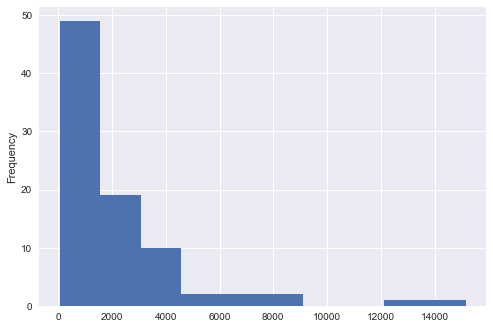

In [16]:
dataDF['to_messages'].plot.hist(bins=10);
plt.show()

In [17]:
dataDF.groupby(['poi'])['to_messages'].describe()

,count,mean,std,min,25%,50%,75%,max
poi,,,,,,,,
0.0,72.0,2007.111111,2693.165955,57.0,513.75,944.0,2590.75,15149.0
1.0,14.0,2417.142857,1961.858101,225.0,1115.75,1875.0,2969.25,7991.0


In [18]:
dataDF.loc[dataDF['to_messages'].idxmax()]

salary                                           269076
to_messages                                       15149
deferral_payments                                   NaN
total_payments                              1.05755e+06
exercised_stock_options                          607837
bonus                                            650000
restricted_stock                                 379164
shared_receipt_with_poi                            4527
restricted_stock_deferred                           NaN
total_stock_value                                987001
expenses                                         137767
loan_advances                                       NaN
from_messages                                      1215
other                                               705
from_this_person_to_poi                              65
poi                                                   0
director_fees                                       NaN
deferred_income                                 

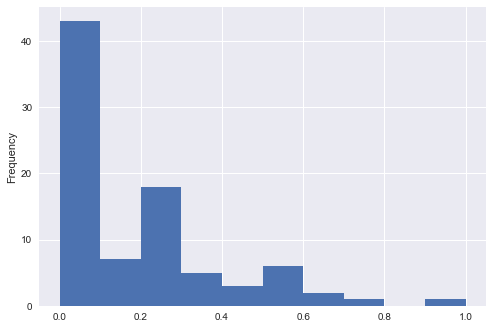

In [19]:
dataDF['percentage_emails_to_poi'].plot.hist(bins=10);
plt.show()

In [20]:
dataDF.groupby(['poi'])['percentage_emails_to_poi'].describe()

,count,mean,std,min,25%,50%,75%,max
poi,,,,,,,,
0.0,72.0,0.152669,0.206057,0.000000,0.00000,0.053776,0.225000,1.00000
1.0,14.0,0.345470,0.156894,0.173611,0.22858,0.276389,0.427083,0.65625


In [21]:
dataDF.loc[dataDF['percentage_emails_to_poi'].idxmax()]

salary                                         130724
to_messages                                       128
deferral_payments                         2.96451e+06
total_payments                            3.10022e+06
exercised_stock_options                   2.28277e+06
bonus                                             NaN
restricted_stock                                  NaN
shared_receipt_with_poi                           119
restricted_stock_deferred                         NaN
total_stock_value                         2.28277e+06
expenses                                         4994
loan_advances                                     NaN
from_messages                                      17
other                                             NaN
from_this_person_to_poi                            17
poi                                                 0
director_fees                                     NaN
deferred_income                                   NaN
long_term_incentive         

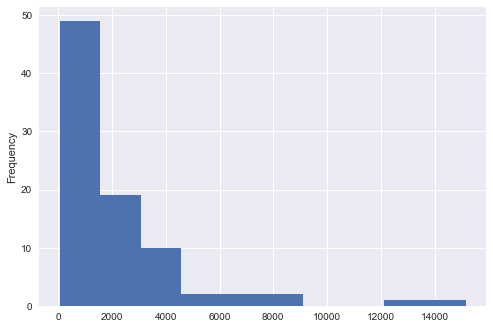

In [22]:
dataDF['to_messages'].plot.hist(bins=10);
plt.show()

In [23]:
dataDF.loc[dataDF['from_messages'].idxmax()]

salary                                          275101
to_messages                                       4607
deferral_payments                                  NaN
total_payments                             1.08682e+06
exercised_stock_options                         850010
bonus                                           400000
restricted_stock                                126027
shared_receipt_with_poi                            583
restricted_stock_deferred                          NaN
total_stock_value                               976037
expenses                                         83585
loan_advances                                      NaN
from_messages                                    14368
other                                             4669
from_this_person_to_poi                            171
poi                                                  0
director_fees                                      NaN
deferred_income                                    NaN
long_term_

In [24]:
dataDF.groupby(['poi'])['percentage_emails_from_poi'].describe()

,count,mean,std,min,25%,50%,75%,max
poi,,,,,,,,
0.0,72.0,0.036107,0.041929,0.000000,0.00776,0.022741,0.050705,0.217341
1.0,14.0,0.047507,0.032085,0.021339,0.02690,0.030639,0.059118,0.136519


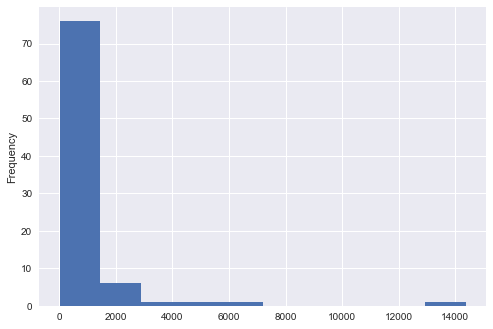

In [25]:
dataDF['from_messages'].plot.hist(bins=10);
plt.show()

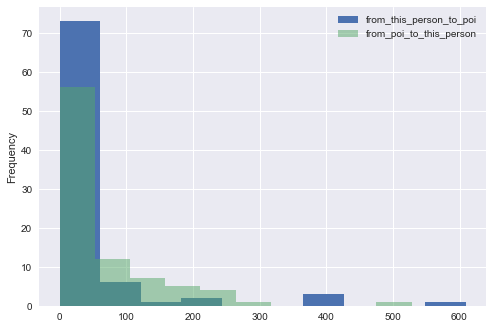

In [26]:
dataDF['from_this_person_to_poi'].plot.hist(stacked=True, legend=True)
dataDF['from_poi_to_this_person'].plot.hist( stacked=True,alpha=.5,legend=True)
plt.show()

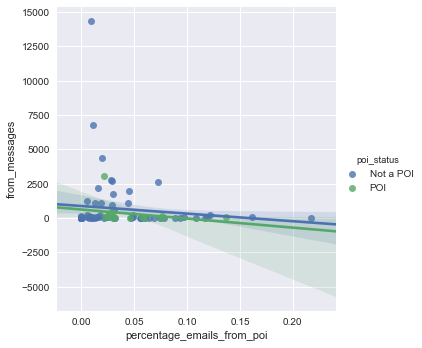

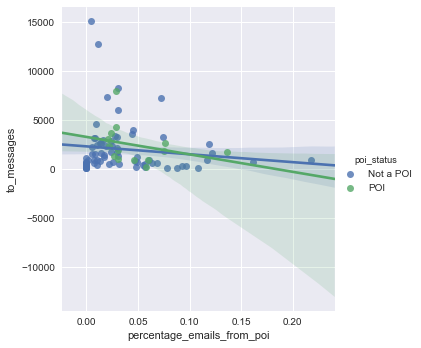

In [27]:
sns.lmplot("percentage_emails_from_poi", 'from_messages', data=dataDF, hue='poi_status', fit_reg=True)
sns.lmplot("percentage_emails_from_poi", 'to_messages', data=dataDF, hue='poi_status', fit_reg=True)
plt.show()

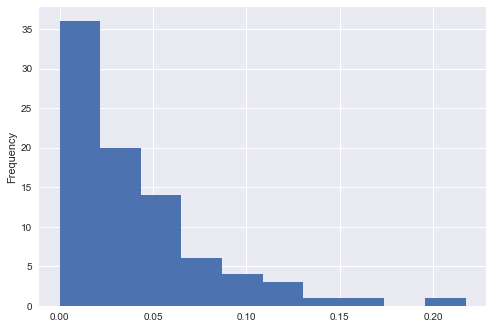

In [28]:
dataDF['percentage_emails_from_poi'].plot.hist(bins=10);
plt.show()

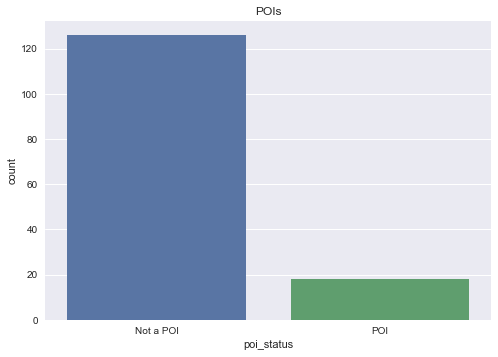

In [29]:
sns.countplot(x="poi_status", data=dataDF)
plt.title('POIs')
plt.show()

In [30]:
poi_only_data=dataDF["poi_status"]=="POI"
not_poi_only_data=dataDF["poi_status"]!="POI"

In [31]:
dataDF[poi_only_data]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person,poi_status,percentage_emails_to_poi,percentage_emails_from_poi
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,NaN,1110705.0,...,108.0,1.0,NaN,-2334434.0,NaN,tim.belden@enron.com,228.0,POI,0.223140,0.028532
BOWEN JR RAYMOND M,278601.0,1858.0,NaN,2669589.0,NaN,1350000.0,252055.0,1593.0,NaN,252055.0,...,15.0,1.0,NaN,-833.0,974293.0,raymond.bowen@enron.com,140.0,POI,0.555556,0.075350
CALGER CHRISTOPHER F,240189.0,2598.0,NaN,1639297.0,NaN,1250000.0,126027.0,2188.0,NaN,126027.0,...,25.0,1.0,NaN,-262500.0,375304.0,christopher.calger@enron.com,199.0,POI,0.173611,0.076597
CAUSEY RICHARD A,415189.0,1892.0,NaN,1868758.0,NaN,1000000.0,2502063.0,1585.0,NaN,2502063.0,...,12.0,1.0,NaN,-235000.0,350000.0,richard.causey@enron.com,58.0,POI,0.244898,0.030655
COLWELL WESLEY,288542.0,1758.0,27610.0,1490344.0,NaN,1200000.0,698242.0,1132.0,NaN,698242.0,...,11.0,1.0,NaN,-144062.0,NaN,wes.colwell@enron.com,240.0,POI,0.275000,0.136519
DELAINEY DAVID W,365163.0,3093.0,NaN,4747979.0,2291113.0,3000000.0,1323148.0,2097.0,NaN,3614261.0,...,609.0,1.0,NaN,NaN,1294981.0,david.delainey@enron.com,66.0,POI,0.198436,0.021339
FASTOW ANDREW S,440698.0,NaN,NaN,2424083.0,NaN,1300000.0,1794412.0,NaN,NaN,1794412.0,...,NaN,1.0,NaN,-1386055.0,1736055.0,andrew.fastow@enron.com,NaN,POI,NaN,NaN
GLISAN JR BEN F,274975.0,873.0,NaN,1272284.0,384728.0,600000.0,393818.0,874.0,NaN,778546.0,...,6.0,1.0,NaN,NaN,71023.0,ben.glisan@enron.com,52.0,POI,0.375000,0.059565
HANNON KEVIN P,243293.0,1045.0,NaN,288682.0,5538001.0,1500000.0,853064.0,1035.0,NaN,6391065.0,...,21.0,1.0,NaN,-3117011.0,1617011.0,kevin.hannon@enron.com,32.0,POI,0.656250,0.030622
HIRKO JOSEPH,NaN,NaN,10259.0,91093.0,30766064.0,NaN,NaN,NaN,NaN,30766064.0,...,NaN,1.0,NaN,NaN,NaN,joe.hirko@enron.com,NaN,POI,NaN,NaN


In [32]:
#Take a closer look at director fees and whether any are POIs 
dataDF[poi_only_data].describe() #Group by POI  

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person,percentage_emails_to_poi,percentage_emails_from_poi
count,1.700000e+01,14.000000,5.000000e+00,1.800000e+01,1.200000e+01,1.600000e+01,1.700000e+01,14.000000,0.0,1.800000e+01,...,14.000000,1.800000e+01,14.000000,18.0,0.0,1.100000e+01,1.200000e+01,14.000000,14.000000,14.000000
mean,3.834449e+05,2417.142857,5.198942e+05,7.913590e+06,1.046379e+07,2.075000e+06,2.318621e+06,1783.000000,NaN,9.165671e+06,...,300.357143,8.029974e+05,66.714286,1.0,NaN,-1.035313e+06,1.204862e+06,97.785714,0.345470,0.047507
std,2.783597e+05,1961.858101,9.128895e+05,2.396549e+07,1.238259e+07,2.047437e+06,3.620811e+06,1264.996625,NaN,1.384117e+07,...,805.844574,2.417568e+06,158.289622,0.0,NaN,1.334972e+06,9.916583e+05,76.058862,0.156894,0.032085
min,1.584030e+05,225.000000,1.025900e+04,9.109300e+04,3.847280e+05,2.000000e+05,1.260270e+05,91.000000,NaN,1.260270e+05,...,16.000000,4.860000e+02,4.000000,1.0,NaN,-3.504386e+06,7.102300e+04,13.000000,0.173611,0.021339
25%,2.401890e+05,1115.750000,2.761000e+04,1.142396e+06,1.456581e+06,7.750000e+05,3.938180e+05,1059.250000,NaN,1.016450e+06,...,33.000000,4.979500e+03,12.500000,1.0,NaN,-1.860244e+06,3.689780e+05,44.500000,0.228580,0.026900
50%,2.786010e+05,1875.000000,2.029110e+05,1.754028e+06,3.914557e+06,1.275000e+06,9.850320e+05,1589.000000,NaN,2.206836e+06,...,44.500000,1.492040e+05,15.500000,1.0,NaN,-2.625000e+05,1.134637e+06,62.000000,0.276389,0.030639
75%,4.151890e+05,2969.250000,2.146780e+05,2.665345e+06,1.938604e+07,2.062500e+06,2.502063e+06,2165.250000,NaN,1.051133e+07,...,101.500000,2.607725e+05,28.750000,1.0,NaN,-1.220310e+05,1.646772e+06,135.750000,0.427083,0.059118
max,1.111258e+06,7991.000000,2.144013e+06,1.035598e+08,3.434838e+07,7.000000e+06,1.476169e+07,5521.000000,NaN,4.911008e+07,...,3069.000000,1.035973e+07,609.000000,1.0,NaN,-8.330000e+02,3.600000e+06,240.000000,0.656250,0.136519


In [33]:
dataDF[not_poi_only_data].describe() 

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person,percentage_emails_to_poi,percentage_emails_from_poi
count,7.700000e+01,72.000000,3.300000e+01,1.050000e+02,8.900000e+01,6.500000e+01,9.200000e+01,72.000000,1.700000e+01,1.070000e+02,...,72.000000,7.300000e+01,72.000000,126.0,16.000000,3.700000e+01,5.300000e+01,72.000000,72.000000,72.000000
mean,2.621515e+05,2007.111111,8.903462e+05,1.738072e+06,1.947752e+06,9.868249e+05,9.310073e+05,1058.527778,6.218928e+05,2.374085e+06,...,668.763889,3.834165e+05,36.277778,0.0,89822.875000,-4.459985e+05,6.427090e+05,58.500000,0.152669,0.036107
std,1.392317e+05,2693.165955,1.341381e+06,2.627417e+06,2.547068e+06,1.173880e+06,1.843451e+06,1132.503757,3.845528e+06,3.535017e+06,...,1978.997801,1.012686e+06,85.139690,0.0,41112.700735,7.627914e+05,8.055904e+05,87.995198,0.206057,0.041929
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,3.285000e+03,7.000000e+04,-2.604490e+06,2.000000,-1.787380e+06,-4.409300e+04,...,12.000000,2.000000e+00,0.000000,0.0,3285.000000,-3.367011e+06,6.922300e+04,0.000000,0.000000,0.000000
25%,2.061210e+05,513.750000,8.543000e+04,3.199410e+05,4.365150e+05,4.000000e+05,2.119995e+05,191.500000,-3.298250e+05,4.246845e+05,...,20.500000,9.470000e+02,0.000000,0.0,83674.500000,-5.750000e+05,2.561910e+05,10.000000,0.000000,0.007760
50%,2.516540e+05,944.000000,2.604550e+05,1.057548e+06,1.030329e+06,7.000000e+05,4.135865e+05,594.000000,-1.402640e+05,1.030329e+06,...,41.000000,1.296100e+04,6.000000,0.0,106164.500000,-1.212840e+05,3.753040e+05,26.500000,0.053776,0.022741
75%,2.885890e+05,2590.750000,8.753070e+05,2.014835e+06,2.165172e+06,1.000000e+06,9.097590e+05,1635.500000,-7.241900e+04,2.307584e+06,...,216.500000,3.746890e+05,23.250000,0.0,112815.000000,-3.666600e+04,6.948620e+05,61.750000,0.225000,0.050705
max,1.060932e+06,15149.000000,6.426990e+06,1.725253e+07,1.536417e+07,8.000000e+06,1.384707e+07,4527.000000,1.545629e+07,2.381793e+07,...,14368.000000,7.427621e+06,411.000000,0.0,137864.000000,-1.042000e+03,5.145434e+06,528.000000,1.000000,0.217341


In [34]:
dataDF["total_payments_by_stock_value"]=dataDF['total_payments']/dataDF["total_stock_value"]

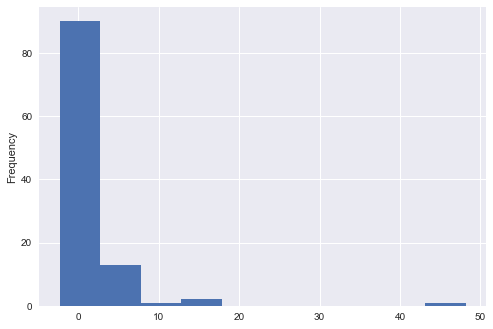

In [35]:
dataDF['total_payments_by_stock_value'].plot.hist(bins=10);
plt.show()

In [36]:
dataDF[poi_only_data]["total_payments_by_stock_value"].describe()

count    18.000000
mean      2.398364
std       3.655552
min       0.002961
25%       0.392759
50%       1.070219
75%       2.127999
max      13.007506
Name: total_payments_by_stock_value, dtype: float64

In [37]:
dataDF[not_poi_only_data]["total_payments_by_stock_value"].describe()

count    89.000000
mean      2.099960
std       5.371623
min      -2.324632
25%       0.291762
50%       0.872703
75%       2.111203
max      48.152302
Name: total_payments_by_stock_value, dtype: float64

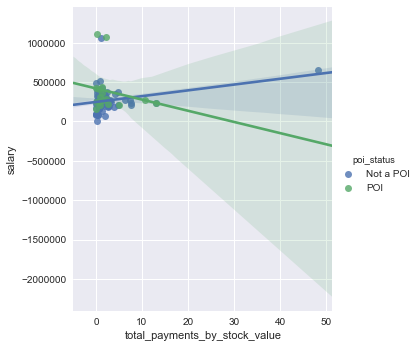

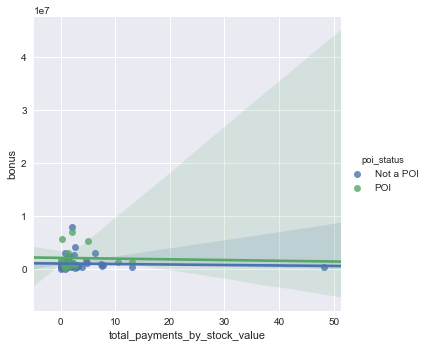

In [38]:
sns.lmplot("total_payments_by_stock_value", 'salary', data=dataDF, hue='poi_status', fit_reg=True)
sns.lmplot("total_payments_by_stock_value", 'bonus', data=dataDF, hue='poi_status', fit_reg=True)

plt.show()

In [39]:
dataDF.loc[dataDF["total_payments_by_stock_value"].idxmax()]

salary                                             655037
to_messages                                           898
deferral_payments                                     NaN
total_payments                                1.38669e+06
exercised_stock_options                             28798
bonus                                              300000
restricted_stock                                      NaN
shared_receipt_with_poi                               728
restricted_stock_deferred                             NaN
total_stock_value                                   28798
expenses                                            31653
loan_advances                                      400000
from_messages                                          67
other                                                 NaN
from_this_person_to_poi                                 0
poi                                                     0
director_fees                                         NaN
deferred_incom

In [40]:
print dataDF.dtypes
enron_num = dataDF.apply(lambda x: pd.to_numeric(x, errors='ignore')).fillna(0)
print enron_num.dtypes

salary                           float64
to_messages                      float64
deferral_payments                float64
total_payments                   float64
exercised_stock_options          float64
bonus                            float64
restricted_stock                 float64
shared_receipt_with_poi          float64
restricted_stock_deferred        float64
total_stock_value                float64
expenses                         float64
loan_advances                    float64
from_messages                    float64
other                            float64
from_this_person_to_poi          float64
poi                              float64
director_fees                    float64
deferred_income                  float64
long_term_incentive              float64
email_address                     object
from_poi_to_this_person          float64
poi_status                        object
percentage_emails_to_poi         float64
percentage_emails_from_poi       float64
total_payments_b

In [41]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
#Utilize all features 
features_list = ['poi','salary', 'deferral_payments', 'total_payments', 'bonus', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'percentage_emails_to_poi', 'percentage_emails_from_poi', 'shared_receipt_with_poi','total_payments_by_stock_value'] # You will need to use more features


In [42]:
data_dict = enron_num.to_dict(orient = 'index')

In [43]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

In [44]:
### Extract features and labels from dataset for local testing

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)


In [45]:
selection=SelectKBest(k=5).fit(features, labels)
new_features=selection.transform(features)


In [46]:
#Taken from Forum 
# Get SelectKBest scores, rounded to 2 decimal places, name them "feature_scores"
feature_scores = ['%.2f' % elem for elem in selection.scores_ ]
# Get SelectKBest pvalues, rounded to 3 decimal places, name them "feature_scores_pvalues"
feature_scores_pvalues = ['%.3f' % elem for elem in  selection.pvalues_ ]
# Get SelectKBest feature names, whose indices are stored in 'skb.get_support',
# create a tuple of feature names, scores and pvalues, name it "features_selected_tuple"
features_selected_tuple=[(features_list[i+1], feature_scores[i], feature_scores_pvalues[i]) for i in selection.get_support(indices=True)]

# Sort the tuple by score, in reverse order
features_selected_tuple = sorted(features_selected_tuple, key=lambda feature: float(feature[1]) , reverse=True)

# Print
print ' '
print 'Selected Features, Scores, P-Values'
print features_selected_tuple

 
Selected Features, Scores, P-Values
[('exercised_stock_options', '24.82', '0.000'), ('total_stock_value', '24.18', '0.000'), ('bonus', '20.79', '0.000'), ('salary', '18.29', '0.000'), ('percentage_emails_to_poi', '16.41', '0.000')]


In [47]:
final_features=[features_list[i+1] for i in selection.get_support(indices=True)]
print final_features

['salary', 'bonus', 'total_stock_value', 'exercised_stock_options', 'percentage_emails_to_poi']


In [48]:
# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(new_features, labels, test_size=0.3, random_state=42)

In [49]:
# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)


In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy = accuracy_score(labels_test,pred)
recall_poi=recall_score(labels_test, pred)
precision_poi=precision_score(labels_test, pred)
print accuracy, recall_poi, precision_poi

0.906976744186 0.6 0.6


In [51]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)


In [52]:
accuracy = accuracy_score(labels_test,pred)
recall_poi=recall_score(labels_test, pred)
precision_poi=precision_score(labels_test, pred)
print accuracy, recall_poi, precision_poi

0.837209302326 0.2 0.25


In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)


In [54]:
accuracy = accuracy_score(labels_test,pred)
recall_poi=recall_score(labels_test, pred)
precision_poi=precision_score(labels_test, pred)
print accuracy, recall_poi, precision_poi

0.860465116279 0.4 0.4


In [55]:
from sklearn import svm
clf = svm.SVC()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

In [56]:
accuracy = accuracy_score(labels_test,pred)
recall_poi=recall_score(labels_test, pred)
precision_poi=precision_score(labels_test, pred)
print accuracy, recall_poi, precision_poi

0.883720930233 0.0 0.0


/Users/JillianOcasio/anaconda/envs/py2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=10,)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

In [58]:
accuracy = accuracy_score(labels_test,pred)
recall_poi=recall_score(labels_test, pred)
precision_poi=precision_score(labels_test, pred)
print accuracy, recall_poi, precision_poi

0.883720930233 0.8 0.5


In [59]:
clf = RandomForestClassifier(n_estimators=10,criterion='entropy',min_samples_split=10,max_features =None)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)


In [60]:
accuracy = accuracy_score(labels_test,pred)
recall_poi=recall_score(labels_test, pred)
precision_poi=precision_score(labels_test, pred)
print accuracy, recall_poi, precision_poi

0.883720930233 0.4 0.5


In [61]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.htm

In [62]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html


In [63]:
###### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You jkxcat the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.
# Plot outliers to see them
dump_classifier_and_data(clf, my_dataset, features_list)

